In [1]:
#import dependencies
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#read csv file into script

dataset = pd.read_csv("C:/Users/Philip Ade-Akanbi/Downloads/Amazon Feb Comments.csv")

# EDA


In [3]:
#check for NULL values

dataset.isnull().sum()

id               0
likesCount       0
ownerUsername    0
postUrl          0
text             0
timestamp        0
dtype: int64

In [4]:
dataset.columns

Index(['id', 'likesCount', 'ownerUsername', 'postUrl', 'text', 'timestamp'], dtype='object')

In [5]:
print(dataset.shape)

dataset.head()

(857, 6)


,id,likesCount,ownerUsername,postUrl,text,timestamp
0,17962471778108044,0,erminbegum,https://www.instagram.com/p/CnhioufrRMd/,@amazon I have already replied that e-mail for...,2023-02-01T08:07:11.000Z
1,18344922256061582,0,duncan.lane2712,https://www.instagram.com/p/CnhioufrRMd/,May be sort out your customer services and pol...,2023-02-01T17:08:12.000Z
2,18015265003505648,0,amazon,https://www.instagram.com/p/CnhioufrRMd/,@duncan.lane2712 Hi there. We're sorry to hear...,2023-02-01T17:13:23.000Z
3,17955951458214502,0,duncan.lane2712,https://www.instagram.com/p/CnhioufrRMd/,@amazon the item was sent back and they had si...,2023-02-01T17:17:09.000Z
4,18093047026314257,0,amazon,https://www.instagram.com/p/CnhioufrRMd/,@duncan.lane2712 Thank you for the additional ...,2023-02-01T17:20:26.000Z


In [6]:
#Rename Columns and Remove Stopwords

dataset.rename(columns={"likesCount": "likes_count", "ownerUsername": "owner_username", "repliesCount": "replies_count"},
               inplace=True)


remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
#dataset["cleaned_text"] = dataset.text.map(remove_rt).map(rt)

dataset["cleaned_text"] = dataset.text.str.lower()

In [7]:
dataset.head()

,id,likes_count,owner_username,postUrl,text,timestamp,cleaned_text
0,17962471778108044,0,erminbegum,https://www.instagram.com/p/CnhioufrRMd/,@amazon I have already replied that e-mail for...,2023-02-01T08:07:11.000Z,@amazon i have already replied that e-mail for...
1,18344922256061582,0,duncan.lane2712,https://www.instagram.com/p/CnhioufrRMd/,May be sort out your customer services and pol...,2023-02-01T17:08:12.000Z,may be sort out your customer services and pol...
2,18015265003505648,0,amazon,https://www.instagram.com/p/CnhioufrRMd/,@duncan.lane2712 Hi there. We're sorry to hear...,2023-02-01T17:13:23.000Z,@duncan.lane2712 hi there. we're sorry to hear...
3,17955951458214502,0,duncan.lane2712,https://www.instagram.com/p/CnhioufrRMd/,@amazon the item was sent back and they had si...,2023-02-01T17:17:09.000Z,@amazon the item was sent back and they had si...
4,18093047026314257,0,amazon,https://www.instagram.com/p/CnhioufrRMd/,@duncan.lane2712 Thank you for the additional ...,2023-02-01T17:20:26.000Z,@duncan.lane2712 thank you for the additional ...


In [8]:
#Calculating Negative, Positive, Neutral and Compound values using Sentiment Intensity Analyzer

 

dataset[['polarity', 'subjectivity']] = dataset['cleaned_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in dataset['cleaned_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp < 0:
        dataset.loc[index, 'sentiment'] = "negative"
    elif comp > 0:
        dataset.loc[index, 'sentiment'] = "positive"
    else:
        dataset.loc[index, 'sentiment'] = "neutral"
    dataset.loc[index, 'neg'] = neg
    dataset.loc[index, 'neu'] = neu
    dataset.loc[index, 'pos'] = pos
    dataset.loc[index, 'compound'] = comp

print(dataset.shape)
dataset.head(10)


(857, 14)


,id,likes_count,owner_username,postUrl,text,timestamp,cleaned_text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,17962471778108044,0,erminbegum,https://www.instagram.com/p/CnhioufrRMd/,@amazon I have already replied that e-mail for...,2023-02-01T08:07:11.000Z,@amazon i have already replied that e-mail for...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,18344922256061582,0,duncan.lane2712,https://www.instagram.com/p/CnhioufrRMd/,May be sort out your customer services and pol...,2023-02-01T17:08:12.000Z,may be sort out your customer services and pol...,0.650000,0.625000,positive,0.069,0.769,0.162,0.5574
2,18015265003505648,0,amazon,https://www.instagram.com/p/CnhioufrRMd/,@duncan.lane2712 Hi there. We're sorry to hear...,2023-02-01T17:13:23.000Z,@duncan.lane2712 hi there. we're sorry to hear...,-0.133333,0.700000,negative,0.074,0.888,0.039,-0.2732
3,17955951458214502,0,duncan.lane2712,https://www.instagram.com/p/CnhioufrRMd/,@amazon the item was sent back and they had si...,2023-02-01T17:17:09.000Z,@amazon the item was sent back and they had si...,0.400000,0.375000,negative,0.116,0.884,0.000,-0.5096
4,18093047026314257,0,amazon,https://www.instagram.com/p/CnhioufrRMd/,@duncan.lane2712 Thank you for the additional ...,2023-02-01T17:20:26.000Z,@duncan.lane2712 thank you for the additional ...,0.144444,0.455556,positive,0.000,0.713,0.287,0.8658
5,17939959751468316,0,christianlawson_calvin.8n,https://www.instagram.com/p/CnhioufrRMd/,"Hey 👋🏻 , I just sent you a message. Please ver...",2023-02-01T21:18:40.000Z,"hey 👋🏻 , i just sent you a message. please ver...",0.200000,0.200000,positive,0.000,0.634,0.366,0.6369
6,17979987280928388,0,w.dinh,https://www.instagram.com/p/CnhioufrRMd/,"1.2 billion dollars, 1.6 million employees, 54...",2023-02-02T05:05:19.000Z,"1.2 billion dollars, 1.6 million employees, 54...",-0.150000,0.400000,neutral,0.000,1.000,0.000,0.0000
7,17974487333054865,0,offers_247,https://www.instagram.com/p/CnhioufrRMd/,For exclusive offers and deals on products che...,2023-02-02T12:11:38.000Z,for exclusive offers and deals on products che...,0.100000,0.000000,positive,0.000,0.880,0.120,0.1280
8,17986653037829795,0,emsaint__,https://www.instagram.com/p/CnhioufrRMd/,This company has jus gone down hill…can’t make...,2023-02-02T17:05:02.000Z,this company has jus gone down hill…can’t make...,-0.155556,0.288889,positive,0.000,0.891,0.109,0.4019
9,18027830464458860,0,shopsolde1,https://www.instagram.com/p/CnhioufrRMd/,Cours amazon free,2023-02-02T23:16:26.000Z,cours amazon free,0.400000,0.800000,positive,0.000,0.167,0.833,0.6124


In [9]:
print(dataset['sentiment'].value_counts())

positive    387
neutral     266
negative    204
Name: sentiment, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sentiment Polarity Analysis')

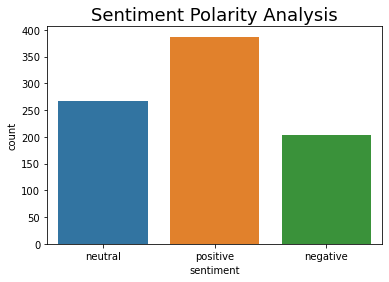

In [10]:
#Visualize the Sentiments' Polarity

sns.countplot(dataset['sentiment'])
plt.title("Sentiment Polarity Analysis", size = 18)


In [11]:
#dataset.to_csv('Instagram Sentiment Analysis_Amazon.csv')